# ExplainableRL: Onboarding recipe

In [1]:
#! pip install explainable-rl

In [2]:
from library import *

In [3]:
warnings.filterwarnings("ignore") # DELETE

# Initialisation

In [4]:
# Load data
dataset = utils.load_data(data_path=hyperparam_dict['dataset']['data_path'],
                          n_samples=hyperparam_dict['dataset']['n_samples'],
                          delimiter=hyperparam_dict['dataset']['col_delimiter'])

In [24]:
# Split in train and test sets
train_dataset, test_dataset = utils.split_train_test(dataset)

In [25]:
# Initialise DataHandler
dh = DataHandler(hyperparam_dict=hyperparam_dict,
                 dataset=train_dataset,
                 test_dataset=test_dataset)

In [26]:
# Initialise Engine
engine = Engine(dh=dh, hyperparam_dict=hyperparam_dict)

In [27]:
# Initialise Agent and Environment
engine.create_world()

# Training

In [28]:
# Train the Agent
engine.train_agent()

100%|██████████| 10000/10000 [00:40<00:00, 244.87it/s]


# Evaluation

In [10]:
# Load lists of Agents to evaluate
engines = utils.load_engine([
    'runs3/q_learner_00.pkl',
    'runs3/q_learner_0.pkl',
    'runs3/q_learner_1.pkl',
    'runs3/double_q_learner_0.pkl',
    'runs3/double_q_learner_1.pkl',
    'runs3/sarsa_0.pkl',
    'runs3/sarsa_1.pkl',
])

In [11]:
# Initialise Evaluator
evaluator = Evaluator(engines = engines)

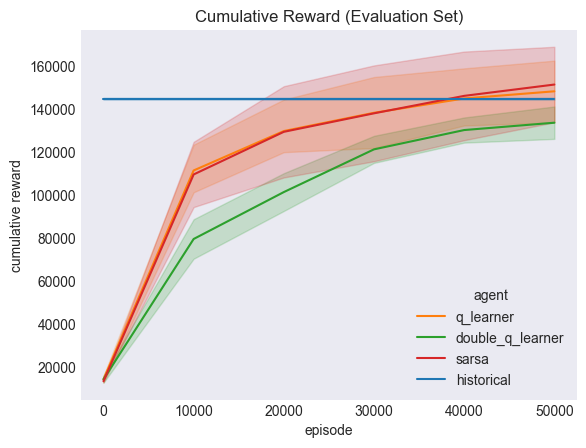

In [30]:
# Plot cumulative reward versus the episodes
evaluator.plot_training_curve()

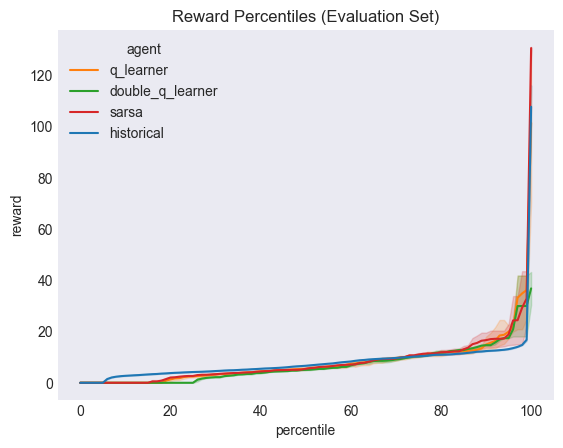

In [31]:
# Plot average rewards distribution
evaluator.plot_reward_distribution()

# Explainability

In [15]:
# Plot PDPs
pdp = PDP(engine=engines[0])
pdp.build_data_for_plots()

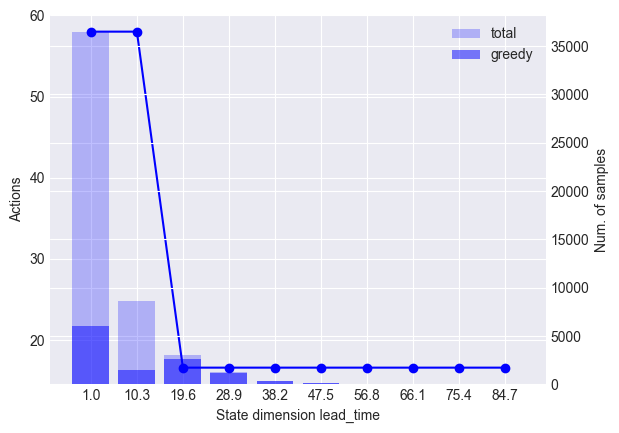

In [32]:
# Plot PDP for feature lead_time (length_of_stay, competitor_price_difference_bin, demand_bin)
fig_name = "PDP plots - lead_time"
pdp.plot_pdp(feature="lead_time", fig_name=fig_name, savefig=False)

In [17]:
# Compute SHAP values
shap_values = ShapValues(engine=engines[0])

In [18]:
sample = [8, 1, 1, 1]
shaps, predicted_action = shap_values.compute_shap_values(sample=sample)

In [33]:
print("Shap values: ", shaps)
print("Predicted action: ", predicted_action)

Shap values:  {'lead_time': 0.92, 'length_of_stay': -9.568, 'competitor_price_difference_bin': 9.384, 'demand_bin': 1.012}
Predicted action:  16.6


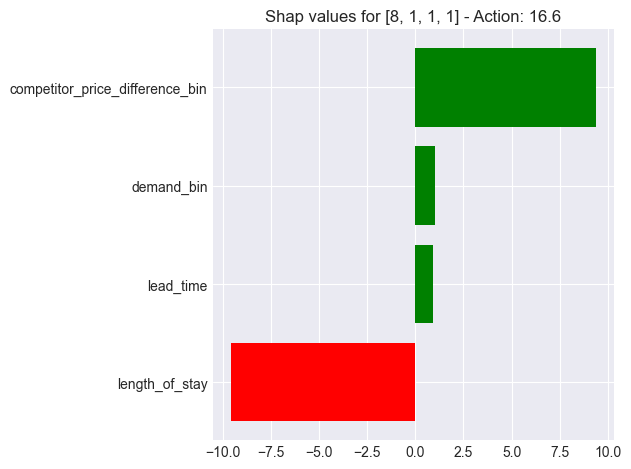

In [34]:
# Plot SHAP values
shap_values.plot_shap_values(sample=sample,
                             shap_values=shaps,
                             predicted_action=predicted_action,
                             fig_name="SHAP values",
                             savefig=False)

# Performance evaluation

In [21]:
# User-defined parameters
results_path = "performance-evaluations"
num_sample_range=[int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
num_ep_range = [int(1e1), int(1e2), int(1e3), int(1e5)]
num_bin_range=[10, 20, 50, 100]

In [22]:
# Instantiate PerformanceEvaluator
performance_evaluator = PerformanceEvaluator(results_path="performance-evaluations",
                                             num_sample_range=num_sample_range,
                                             num_ep_range=num_ep_range,
                                             num_bin_range=num_bin_range,
                                             verbose=True)


GETTING BENCHMARK PERFORMANCE
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 300.50it/s]



GETTING PERFORMANCE GRAPHS
* Plot of performance vs number of samples
-> Running training loop for 10 episodes, 10 bins, 100 samples


100%|██████████| 10/10 [00:00<00:00, 321.40it/s]


-> Running training loop for 10 episodes, 10 bins, 1000 samples


100%|██████████| 10/10 [00:00<00:00, 236.73it/s]


-> Running training loop for 10 episodes, 10 bins, 10000 samples


100%|██████████| 10/10 [00:00<00:00, 322.39it/s]


-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 319.45it/s]


-> Running training loop for 10 episodes, 10 bins, 1000000 samples


100%|██████████| 10/10 [00:00<00:00, 267.08it/s]


* Plot of performance vs number of episodes
-> Running training loop for 10 episodes, 10 bins, 100000 samples


KeyboardInterrupt: 

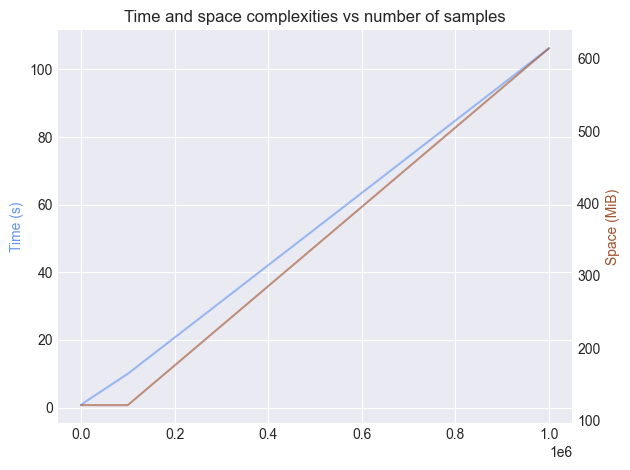

In [23]:
# Get results
performance_evaluator.get_all_performance_evaluations()

# Documentation

In [ ]:
## Update documentation

# Go to documentation folder
os.chdir("documentation")

# Automatically update the documentation
! make html

# Go back to repository root
os.chdir("..")

In [ ]:
## Access documentation

# Go to the html sub-folder of the documentation
os.chdir("documentation/_build/html")

# Open the documentation at the index page
! open index.html

# Go back to repository root
os.chdir("../../..")